# LinearRegression

In [77]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vehicle_df = pd.read_csv('./input_data/FuelEconomy.csv')
vehicle_df.head()

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [12]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


## DataViz

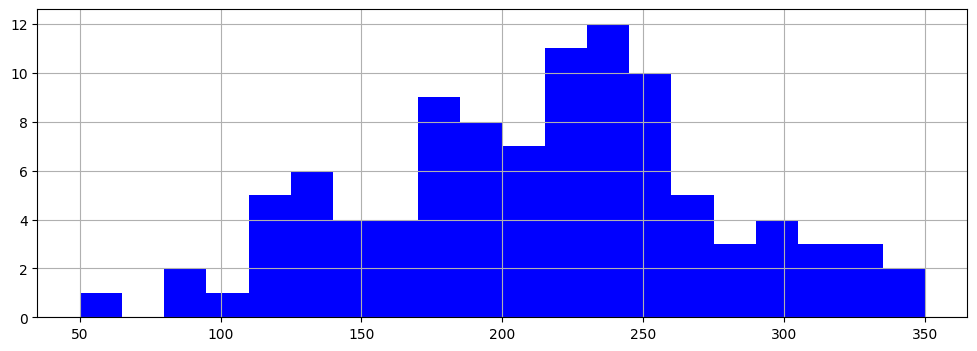

In [28]:
# ヒストグラム
plt.figure(figsize=(12, 4))
vehicle_df['Horse Power'].hist(bins = 20, color = 'b');

<Figure size 800x800 with 0 Axes>

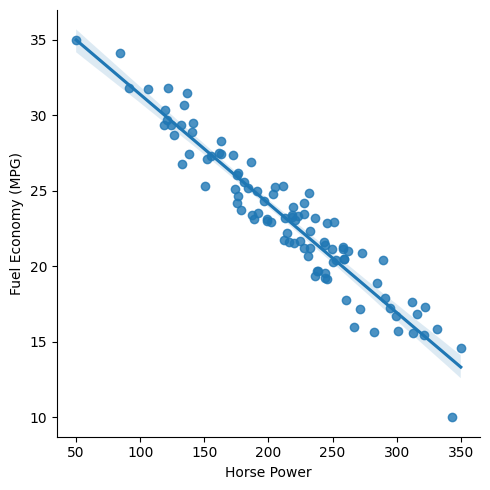

In [41]:
# 線型グラフの可視化
plt.figure(figsize=(8, 8))
sns.lmplot(x='Horse Power', y='Fuel Economy (MPG)', data=vehicle_df);

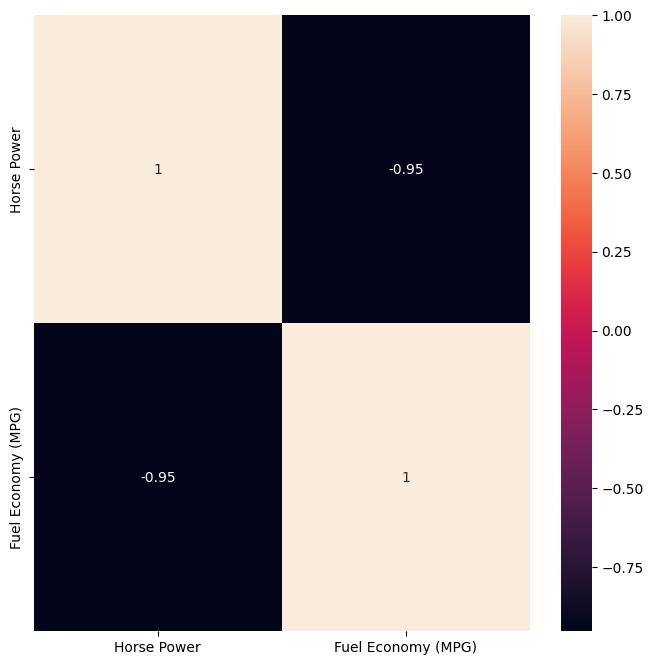

In [40]:
# 相関
plt.figure(figsize=(8, 8))
corr_matrix = vehicle_df.corr()
sns.heatmap(corr_matrix, annot = True);

## モデリング

In [58]:
X=vehicle_df[['Horse Power']]
y=vehicle_df[['Fuel Economy (MPG)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [60]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [61]:
# 切片と傾き
print('Linear Model Coefficient (a): ', reg.coef_) # 傾き
print('Linear Model Coefficient (b): ', reg.intercept_) #切片

Linear Model Coefficient (a):  [[-0.07402398]]
Linear Model Coefficient (b):  [38.99734617]


In [55]:
# 予測値の決定係数
reg.score(X_train, y_train)

0.9067516070482614

In [65]:
# 予測
y_pred = reg.predict(X_test)

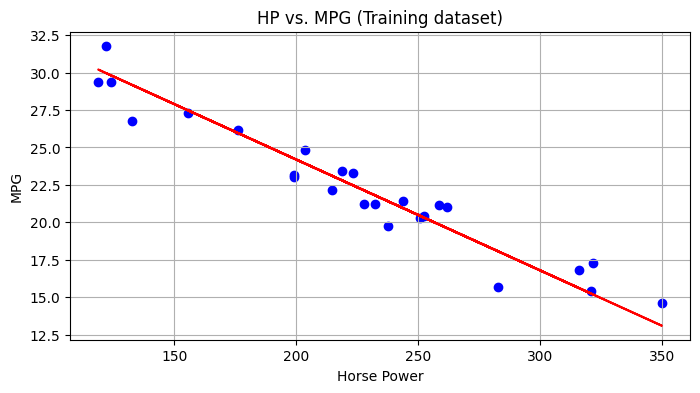

In [68]:
# グラフの作成
plt.figure(figsize=(8,4))
plt.scatter(X_test, y_test, color = 'b')
plt.plot(X_test, y_pred, color = 'r')
plt.ylabel('MPG')
plt.xlabel('Horse Power')
plt.title('HP vs. MPG (Training dataset)')
plt.grid()

In [76]:
# MSE（平均二乗誤差）　'''値が小さいほど精度が良い'''
mean_squared_error(y_test, y_pred)

1.5103619197724354

In [79]:
#RMSE（二乗平均平方根誤差）
np.sqrt(mean_squared_error(y_test, y_pred))

1.228967826988337

In [74]:
# MAE（平均絶対誤差）　'''値が小さいほど精度が良い'''
mean_absolute_error(y_test, y_pred)

1.0275894556415133